### The Titanic was a British passenger liner which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. <P>
    
### It is possibly one of the deadliest peacetime sinking of a superliner or cruise ship. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died. <P>
    
<img src="Titanic.jpg"/>

## The Dataset:
Titanic Data Set from Kaggle: https://www.kaggle.com/c/titanic. 

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

## Data Dictionary

- **PassegerId:** numeric
- **Survived:**	0 = No, 1 = Yes
- **Pclass:**	1 = 1st, 2 = 2nd, 3 = 3rd
- **Name:**     text
- **sex:**      male or female	
- **Age:**	    numeric	
- **SibSp:**	# of siblings / spouses aboard the Titanic (numeric)	
- **Parch:**	# of parents / children aboard the Titanic (numeric)
- **Ticket:**	Ticket number (alphanumeric)
- **Fare:**	    Passenger fare (float)
- **Cabin:**	Cabin number (alphanumeric)
- **Embarked:**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read training data into a dataframe
train = pd.read_csv('titanic_train.csv')

In [3]:
# Show the first few rows of the dataframe
train.head(4)
#NaN indicates that the csv did not have a value in this area
# from all the other features combined, tell us if the passenger survived
# there may not be a pattern in this data


# what do we do with NaN and the alpha-numeric numbers like the Ticket Number or Cabin Number
# there may be information embedded in these, but we would have to encode it


# we might end up dropping some columns because they will be unhelpful or hard to translate into the algorithm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# Some statistical information about the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Checking if there are missing values in the dataset
train.info()
#we can see in age there are 714 non-null values out of the range index of 891 entries
# it is lacking, but maybe not hopless


#cabin is really looking rough - most likely a hopless column of data - we will probaly cut it out


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Note: 
**There are missing values in the two columns:**
- Age (177 missing values or 20%)
- Cabin (687 missing values or 77%)
- Embarked (2 missing values or 0.22%)

# Exploring the data:
- Bar chart of Survivors vs. non-survivors
- Bar Chart of Survivors vs. non-survivors, by gender
- Bar chat of survivors vs. non-survivors, by passenger class
- A histogram of age distribution of passengers
- Average age of passengers
- Number of survivors, by age group
- How many survived (or not) within specific age groups
- Average age of passengers, by class
- Number of people traveling with a passenger
- Fares paid by various passengers

# Number of passengers in each class

In [6]:
count = np.array([0, 0, 0])

cnt = train[train['Pclass']==1]
count[0] = len(cnt)
print('Number of class-1 passengers: ', count[0])

cnt = train[train['Pclass']==2]
count[1] = len(cnt)
print('Number of class-2 passengers: ', count[1])

cnt = train[train['Pclass']==3]
count[2] = len(cnt)
print('Number of class-3 passengers: ', count[2])

Number of class-1 passengers:  216
Number of class-2 passengers:  184
Number of class-3 passengers:  491


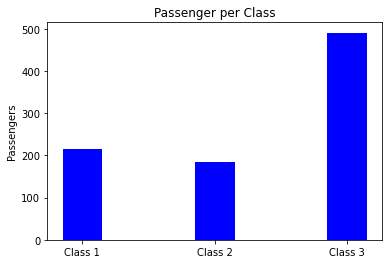

In [7]:
classes = ['Class-1', 'Class-2', 'Class-3']
plt.bar(classes, count, width=0.3, color="blue")
plt.xticks(classes, ('Class 1', 'Class 2', 'Class 3'))
plt.ylabel('Passengers')
plt.title('Passenger per Class')
plt.show()

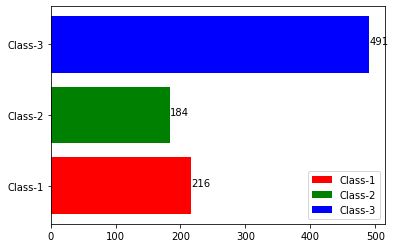

In [8]:
colors = ['red', 'green', 'blue']
for i, j, c in zip(classes, count, colors):
    plt.barh(i, j, color = c, align = 'center', label = classes)

plt.legend(['Class-1', 'Class-2', 'Class-3'], loc='best')

for index, value in enumerate(count):
    plt.text(value, index, str(value))

## Counting the number of survivors and non-survivors

In [10]:
from collections import Counter

c = Counter(train['Survived'])
print('c=', c)

c_keys = list(c.keys())
print('Keys:', c_keys)

c_values = list(c.values())
print('Values:', c_values)

c= Counter({0: 549, 1: 342})
Keys: [0, 1]
Values: [549, 342]


## A Bar chart of survivors and non-survivors

Text(0.5, 1.0, 'Survival')

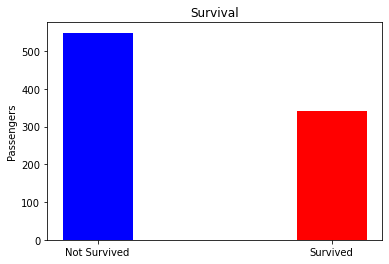

In [11]:
plt.bar(c_keys, c_values, width=0.3, color=["blue", "red"])
plt.xticks(c_keys, ('Not Survived', 'Survived'))
plt.ylabel('Passengers')
plt.title('Survival')

## Counting survivors vs. non-survivors, by *gender*

In [12]:
# for each row I need to find the gender and the survival status
# Males
sm  = train[(train['Survived']==1) & (train['Sex']=='male')] #only when BOTH of these condidtions are true
nsm = train[(train['Survived']==0) & (train['Sex']=='male')]

# Females
sf  = train[(train['Survived']==1) & (train['Sex']=='female')]
nsf = train[(train['Survived']==0) & (train['Sex']=='female')]

print('Surviving males: ', len(sm), 'Non-surviving males:', len(nsm))
print('Surviving females: ', len(sf), 'Non-surviving females:', len(nsf))

Surviving males:  109 Non-surviving males: 468
Surviving females:  233 Non-surviving females: 81


## Bar chart of survivors vs. non-survivors by gender

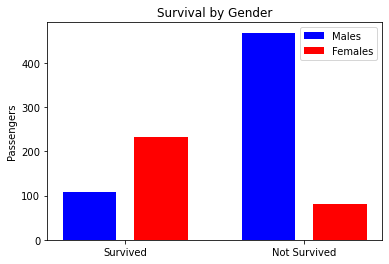

In [13]:
males = (len(sm), len(nsm))
females = (len(sf), len(nsf))
       
plt.bar([0, 1], males, width=0.3, label='Males', color=["blue"])
plt.bar([0.4, 1.4] , females, width=0.3, label='Females', color=["red"])

plt.ylabel('Passengers')
plt.title('Survival by Gender')
plt.xticks([0.2,1.2], ('Survived', 'Not Survived'))
plt.legend(loc='best')
plt.show()

## Breakdown of survivors vs. non-survivors by *class*

In [14]:
c1s = len(train[(train['Survived']==1) & (train['Pclass']==1)])
c2s = len(train[(train['Survived']==1) & (train['Pclass']==2)])
c3s = len(train[(train['Survived']==1) & (train['Pclass']==3)])

c1ns = len(train[(train['Survived']==0) & (train['Pclass']==1)])
c2ns = len(train[(train['Survived']==0) & (train['Pclass']==2)])
c3ns = len(train[(train['Survived']==0) & (train['Pclass']==3)])

## Bar chart of survivors vs. non-survivors by *class*

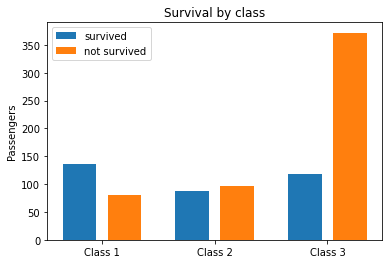

In [18]:
survived = (c1s, c2s, c3s)
not_survived = (c1ns, c2ns, c3ns)

plt.bar([0, 1, 2], survived, width=0.3, label='survived')
plt.bar([0.4, 1.4, 2.4] , not_survived, width=0.3, label='not survived')

plt.ylabel('Passengers')
plt.title('Survival by class')
plt.xticks([0.2,1.2, 2.2], ('Class 1', 'Class 2', 'Class 3'))
plt.legend(loc='best')
plt.show()

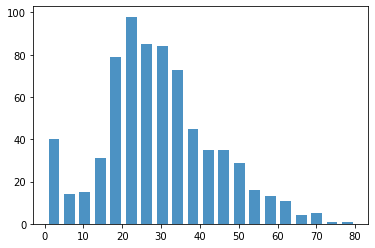

In [19]:
# Age Distribution: Histogram of 'Age'
plt.hist(train['Age'].dropna(), bins=20, alpha=0.8, rwidth=0.7)
plt.show()

# drop non-values out of the age column 
#as you are getting the number of people by age - divide into 20 different groups

In [20]:
# What is the mean age of the passengers?
train['Age'].dropna().mean()


29.69911764705882

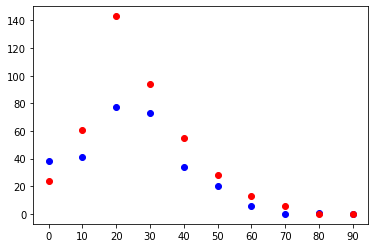

In [21]:
# Define different age groups (0-10, 11-20, 21-30, ...) and
# Count number of survivors within each age group

df2 = train.dropna(subset=['Age'])

s_groups = np.zeros(10)
ns_groups = np.zeros(10)
for i in range(len(df2)):
    age_group = int(df2.iloc[i]['Age'] //10 )
    if df2.iloc[i]['Survived']==1:
        s_groups[age_group] += 1
    else:
         ns_groups[age_group] += 1   
        
x_val = pd.DataFrame(list(range(len(s_groups))))*10
plt.scatter(x_val, s_groups, c='b')
plt.scatter(x_val, ns_groups, c='r')
plt.xticks(x_val)
plt.show()

In [22]:
# Find Average age per passenger class
#age_in_class = np.zeros(3)
class_1 = train[train['Pclass']==1]
mean_class_1 = (class_1['Age'].dropna()).mean()

class_2 = train[train['Pclass']==2]
mean_class_2 = (class_2['Age'].dropna()).mean()

class_3 = train[train['Pclass']==3]
mean_class_3 = (class_3['Age'].dropna()).mean()

print('Average. Age:')
print('- class 1:',round(mean_class_1))
print('- class 2:',round(mean_class_2))
print('- class 3:',round(mean_class_3))

Average. Age:
- class 1: 38
- class 2: 30
- class 3: 25


In [23]:
# Number of people traveling with a passenger

c = Counter(train['SibSp'])
print(c)

Counter({0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5})


In [24]:
y = c.most_common()
print(y)

[(0, 608), (1, 209), (2, 28), (4, 18), (3, 16), (8, 7), (5, 5)]


<BarContainer object of 7 artists>

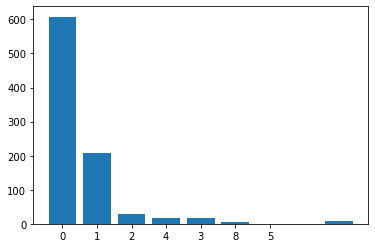

In [25]:
sib_list = []; count_list = []
for elem in y:
    sib, count = elem
    sib_list.append(sib)
    count_list.append(count)

plt.xticks(range(len(sib_list)), sib_list)
plt.bar(sib_list, count_list)

<AxesSubplot:>

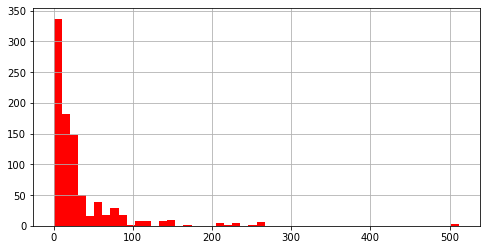

In [26]:
train['Fare'].hist(color='red',bins=50,figsize=(8,4))

## Imputing the missing data in the 'Age' column
- find the mean age for each passenger class
- Impute the age missing data using these computed values

In [30]:
def compute_average_age_by_class():
    a1 = train[train['Pclass']==1]['Age'].mean()
    a2 = train[train['Pclass']==2]['Age'].mean()
    a3 = train[train['Pclass']==3]['Age'].mean()
    return a1, a2, a3

In [29]:
def impute_age(cols):
    a1, a2, a3 = compute_average_age_by_class()
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return a1
        elif Pclass == 2:
            return a2
        else:
            return a3
    else:
        return Age
# assign to each empty value this new computed number - basically the average age

In [31]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
train.drop('Cabin',axis=1,inplace=True) # use the column axis and place it back in the original spot

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [40]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [41]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

KeyError: 'Sex'

In [42]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [43]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [44]:
train = pd.concat([train,sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0


## Using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [55]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X,y)

LogisticRegression(max_iter=1000)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=97)

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       173
           1       0.73      0.64      0.68        94

    accuracy                           0.79       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.79      0.79      0.79       267



## Using Test Data

In [59]:
# read training data into a dataframe
test = pd.read_csv('titanic_test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [60]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [61]:
test.drop('Cabin',axis=1,inplace=True)

In [62]:
test.dropna(inplace=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test = pd.concat([test,sex,embark],axis=1)
print(test.info())
test.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Age          417 non-null    float64
 3   SibSp        417 non-null    int64  
 4   Parch        417 non-null    int64  
 5   Fare         417 non-null    float64
 6   male         417 non-null    uint8  
 7   Q            417 non-null    uint8  
 8   S            417 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 24.0 KB
None


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1


In [63]:
#X_test = test.drop('Survived',axis=1)
#y_test = test['Survived']

predictions = logmodel.predict(test)

C:\Users\emmasch\Anaconda3\envs\tf2\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 9 features, but LogisticRegression is expecting 12 features as input.

### Can we consider "Title" from the name, Cabin letter, Ticket as a feature?